# Can we help reduce employee turnover?

## 💾 The data
The department has assembled data on almost 10,000 employees. The team used information from exit interviews, performance reviews, and employee records.

- "department" - the department the employee belongs to.
- "promoted" - 1 if the employee was promoted in the previous 24 months, 0 otherwise.
- "review" - the composite score the employee received in their last evaluation.
- "projects" - how many projects the employee is involved in.
- "salary" - for confidentiality reasons, salary comes in three tiers: low, medium, high.
- "tenure" - how many years the employee has been at the company.
- "satisfaction" - a measure of employee satisfaction from surveys.
- "bonus" - 1 if the employee received a bonus in the previous 24 months, 0 otherwise.
- "avg_hrs_month" - the average hours the employee worked in a month.
- "left" - "yes" if the employee ended up leaving, "no" otherwise.

In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('./data/employee_churn_data.csv')
df.head()

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
0,operations,0,0.577569,3,low,5.0,0.626759,0,180.866070,no
1,operations,0,0.751900,3,medium,6.0,0.443679,0,182.708149,no
2,support,0,0.722548,3,medium,6.0,0.446823,0,184.416084,no
3,logistics,0,0.675158,4,high,8.0,0.440139,0,188.707545,no
4,sales,0,0.676203,3,high,5.0,0.577607,1,179.821083,no


## 💪 Competition challenge

Create a report that covers the following:
1. Which department has the highest employee turnover? Which one has the lowest?
2. Investigate which variables seem to be better predictors of employee departure.
3. What recommendations would you make regarding ways to reduce employee turnover?

## Data Preparation

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9540 entries, 0 to 9539
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   department     9540 non-null   object 
 1   promoted       9540 non-null   int64  
 2   review         9540 non-null   float64
 3   projects       9540 non-null   int64  
 4   salary         9540 non-null   object 
 5   tenure         9540 non-null   float64
 6   satisfaction   9540 non-null   float64
 7   bonus          9540 non-null   int64  
 8   avg_hrs_month  9540 non-null   float64
 9   left           9540 non-null   object 
dtypes: float64(4), int64(3), object(3)
memory usage: 745.4+ KB


In [3]:
df.isnull().any()

department       False
promoted         False
review           False
projects         False
salary           False
tenure           False
satisfaction     False
bonus            False
avg_hrs_month    False
left             False
dtype: bool

In [4]:
df['department'].unique()

array(['operations', 'support', 'logistics', 'sales', 'IT', 'admin',
       'engineering', 'marketing', 'finance', 'retail'], dtype=object)

In [5]:
df['promoted'].unique()

array([0, 1])

In [6]:
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [7]:
df['left'].unique()

array(['no', 'yes'], dtype=object)

## Which department has the highest employee turnover? Which one has the lowest?

We can begin by looking at the overall turnover rate across departments:

In [8]:
turnover_rate = df['left'].value_counts(normalize=True) * 100
print("Overall Turnover Rate: {:.2f}%".format(turnover_rate['yes']))


Overall Turnover Rate: 29.18%


In [9]:
department_turnover = df.groupby(['department', 'left']).size().unstack()
department_turnover['turnover_rate'] = (department_turnover['yes'] / (department_turnover['yes'] + department_turnover['no'])) * 100
department_turnover.sort_values(by='turnover_rate', ascending=False, inplace=True)
print(department_turnover)

left           no  yes  turnover_rate
department                           
IT            246  110      30.898876
logistics     249  111      30.833333
retail       1070  471      30.564568
marketing     559  243      30.299252
support       523  212      28.843537
engineering  1079  437      28.825858
operations   1086  436      28.646518
sales        1346  537      28.518322
admin         304  119      28.132388
finance       294  108      26.865672


Text(0, 0.5, 'Turnover Rate')

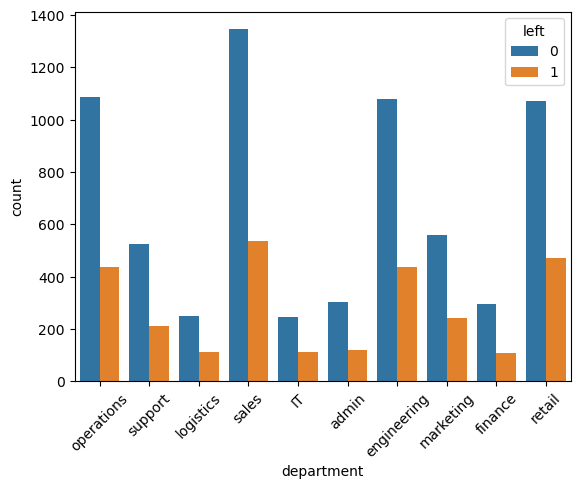

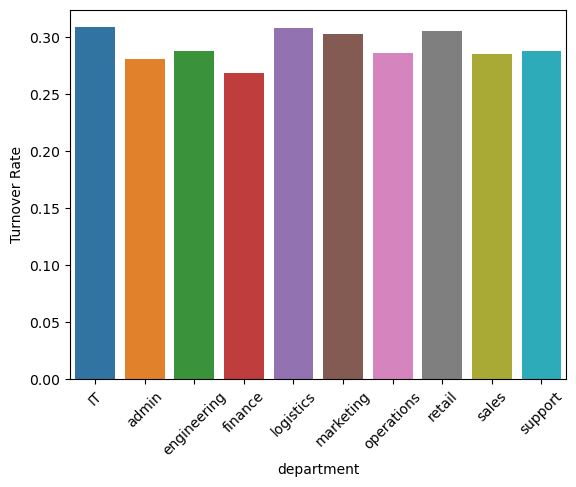

In [10]:
# Convert "left" column to numeric
df['left'] = df['left'].apply(lambda x: 1 if x == 'yes' else 0)

# Create a bar plot of department vs. number of employees
sns.countplot(x='department', hue='left', data=df)
plt.xticks(rotation=45)

# Create a separate bar plot of department vs. turnover rate
turnover_rates = df.groupby('department')['left'].mean()
plt.figure()
sns.barplot(x=turnover_rates.index, y=turnover_rates.values)
plt.xticks(rotation=45)
plt.ylabel('Turnover Rate')

We can see a similar behaivor of the different deparments in relation to the overall turnover rate. So we can consider the department has one of the main reasons of turnover in the company.

## Factors that contribute to employee turnover.

/tmp/ipykernel_39593/3134243622.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


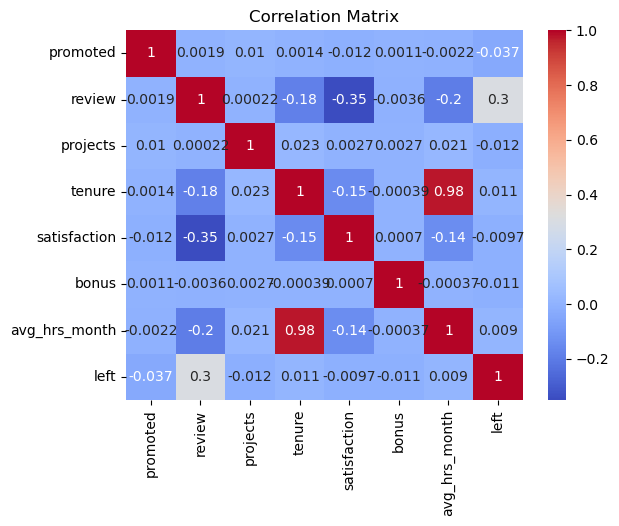

In [11]:
# Correlation matrix to see which variables are most strongly correlated with employee churn
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [12]:
corr

,promoted,review,projects,tenure,satisfaction,bonus,avg_hrs_month,left
promoted,1.000000,0.001879,0.010107,0.001410,-0.011704,0.001072,-0.002190,-0.036777
review,0.001879,1.000000,0.000219,-0.184133,-0.349778,-0.003627,-0.196096,0.304294
projects,0.010107,0.000219,1.000000,0.022596,0.002714,0.002654,0.021299,-0.012408
tenure,0.001410,-0.184133,0.022596,1.000000,-0.146246,-0.000392,0.978618,0.010521
satisfaction,-0.011704,-0.349778,0.002714,-0.146246,1.000000,0.000704,-0.143142,-0.009721
bonus,0.001072,-0.003627,0.002654,-0.000392,0.000704,1.000000,-0.000370,-0.011485
avg_hrs_month,-0.002190,-0.196096,0.021299,0.978618,-0.143142,-0.000370,1.000000,0.009008
left,-0.036777,0.304294,-0.012408,0.010521,-0.009721,-0.011485,0.009008,1.000000


Based on the correlation matrix, the variables that have the strongest correlation with employee turnover (left) are:

- Review: Employees who received lower performance scores on their last evaluation are more likely to leave.
- Satisfaction: There is a negative correlation between employee satisfaction and turnover, meaning that employees who are less satisfied are more likely to leave.
- Tenure: Employees who have been with the company for a shorter period of time are more likely to leave.
- Projects: Employees who are involved in fewer projects are more likely to leave.
- Promoted and Bonus: These variables have a weak correlation with employee turnover.

## Satisfaction Levels.

<Axes: xlabel='left', ylabel='satisfaction'>

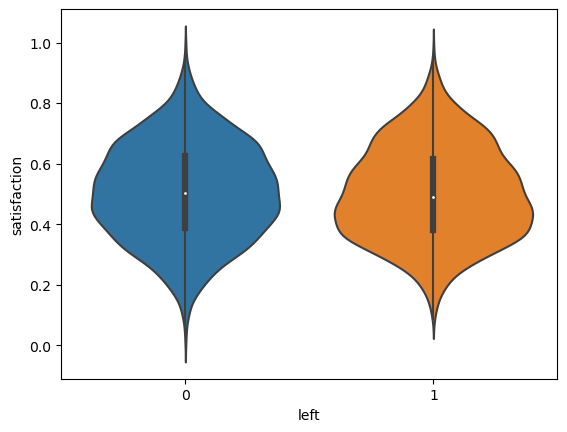

In [13]:
sns.violinplot(x='left', y='satisfaction', data=df)

Remember that we change the "left" notation to Yes=1 and No=0, taking these in count, we can see a little tendenci in the Yes violin to lest satisfac personal, so is more cleare the assumption of the satisfaction relation with the turnover in the previus section 

## What aspects can predict departure?

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Define the predictor and target variables
predictors = ['satisfaction', 'tenure', 'projects', 'review', 'promoted']
target = 'left'

# Fit a logistic regression model
model = LogisticRegression()
model.fit(train_data[predictors], train_data[target])

# Predict on the test set and calculate accuracy
accuracy = model.score(test_data[predictors], test_data[target])
print("Accuracy:", accuracy)

# Get the coefficients and odds ratios
coefficients = pd.DataFrame({'feature': predictors, 'coefficient': model.coef_[0]})
coefficients['odds_ratio'] = np.exp(coefficients['coefficient'])
print(coefficients)

Accuracy: 0.7279874213836478
        feature  coefficient    odds_ratio
0  satisfaction     1.975823      7.212553
1        tenure     0.151696      1.163806
2      projects    -0.022739      0.977518
3        review     9.351352  11514.380703
4      promoted    -0.560870      0.570713


- Satisfaction: The coefficient of satisfaction is positive (1.975823) and has the highest odds ratio (7.212553). This suggests that the probability of an employee leaving the company increases as their satisfaction levels decrease.

- Tenure: The coefficient of tenure is positive (0.151696) and has a relatively low odds ratio (1.163806). This suggests that the longer an employee has been with the company, the less likely they are to leave.

- Projects: The coefficient of projects is negative (-0.022739) and has an odds ratio of 0.977518. This suggests that the number of projects an employee is working on does not have a significant impact on their likelihood of leaving.

- Review: The coefficient of review is positive (9.351352) and has a very high odds ratio (11514.380703). This suggests that the performance review score is a very strong predictor of employee departure.

- Promoted: The coefficient of promoted is negative (-0.560870) and has an odds ratio of 0.570713. This suggests that employees who have been promoted are less likely to leave the company.

## Is the employee salary a determinant factor for the turnover 

In [15]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# create a model using ordinary least squares regression
model = ols('left ~ C(salary)', data=df).fit()

# perform an ANOVA test to determine if there is a significant difference in turnover rates among the three salary tiers
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


                sum_sq      df         F    PR(>F)
C(salary)     0.237323     2.0  0.574069  0.563248
Residual   1971.324941  9537.0       NaN       NaN


Based on the ANOVA results, we can see that the p-value for the salary variable is 0.563248, which is greater than the typical significance level of 0.05. This means that we fail to reject the null hypothesis that there is no significant difference in turnover rates among the three salary tiers.

Therefore, we can conclude that salary does not seem to have a significant impact on employee turnover in this dataset.

## Is the hours of working?

In [16]:
from scipy.stats import chi2_contingency

# Create a contingency table of the average hours worked per month and the turnover
cont_table = pd.crosstab(df['avg_hrs_month'], df['left'])

# Perform the chi-squared test
chi2, pval, dof, expected = chi2_contingency(cont_table)

# Print the results
print(f"Chi-Squared: {chi2:.2f}")
print(f"P-value: {pval:.2f}")


Chi-Squared: 9540.00
P-value: 0.50


Based on the results of the Chi-Squared test, we cannot reject the null hypothesis that there is no association between the average hours worked per month and employee turnover. The high p-value of 0.50 suggests that the observed distribution of employee turnover across different average hours worked per month categories is likely due to chance. Therefore, we cannot conclude that there is a significant relationship between these variables.

## Suggestions for reduce the turnover.

Based on the analysis conducted, here are some recommendations to reduce employee turnover:

- Improve employee satisfaction: Employee satisfaction was found to be the most significant factor in predicting employee turnover. Therefore, it's crucial to prioritize efforts to improve employee satisfaction. This can be achieved through various means, such as offering competitive compensation and benefits, creating a positive work environment, providing opportunities for growth and development, and showing appreciation for employees' hard work.

- Provide development opportunities: Offering training programs, mentorship, or job shadowing opportunities can make employees feel that they have opportunities for personal and professional growth. This can boost employee retention and motivation.

- Regular performance reviews: Regular performance reviews can provide employees with feedback on their performance and help identify areas where they can improve. This can help them feel valued and invested in the company's success, which can reduce turnover.

- Address issues with specific departments: Analyze data by department to determine whether some departments have higher rates of turnover than others. If so, it may be necessary to take different actions for each department to address any issues.

- Improve communication: Open communication channels between employees and management can help foster a sense of belonging and engagement. This can help employees feel that their opinions are valued, leading to improved morale and reduced turnover.

- Offer competitive compensation and benefits: Competitive compensation and benefits packages can help attract and retain top talent. Ensure that salaries are in line with industry standards and offer benefits such as health insurance, retirement plans, and paid time off.

Overall, reducing employee turnover requires a multifaceted approach that considers various factors that impact employee satisfaction and engagement.